In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
# data partition
from sklearn.model_selection import train_test_split
from math import ceil

#filter methods
# spearman 
# chi-square
import scipy.stats as stats
from scipy.stats import chi2_contingency


# embedded methods
from sklearn.linear_model import LassoCV

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, RobustScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, median_absolute_error
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import StackingClassifier

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

import time


# Pre-processing Data

In [32]:
test = pd.read_csv('test.csv')
sample = pd.read_csv('sample_submission.csv')
train = pd.read_csv('train.csv')

In [33]:
test.set_index('Access_ID', inplace = True)
train.set_index('Access_ID',inplace = True) 

### Outlier Removal

In [34]:
train.describe()

,AccountMng_Pages,AccountMng_Duration,FAQ_Pages,FAQ_Duration,Product_Pages,Product_Duration,GoogleAnalytics_BounceRate,GoogleAnalytics_ExitRate,GoogleAnalytics_PageValue,Browser,Type_of_Traffic,Buy
count,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,2.324232,81.205854,0.508051,34.559101,31.685869,1199.769430,0.022305,0.043181,5.963120,2.352535,3.957496,0.155216
std,3.340676,179.715545,1.279390,139.796989,44.550277,1958.276304,0.048776,0.048845,18.753626,1.715698,3.675159,0.362128
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,183.562500,0.000000,0.014300,0.000000,2.000000,2.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,599.000000,0.003200,0.025100,0.000000,2.000000,2.000000,0.000000
75%,4.000000,92.208350,0.000000,0.000000,38.000000,1470.270800,0.016800,0.050000,0.000000,2.000000,4.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522200,0.200000,0.200000,361.763700,13.000000,15.000000,1.000000


In [35]:
metric_features = ['AccountMng_Pages','AccountMng_Duration','FAQ_Pages','FAQ_Duration', 'Product_Pages', 'Product_Duration', 'GoogleAnalytics_BounceRate', 'GoogleAnalytics_ExitRate', 'GoogleAnalytics_PageValue']
non_metric_features = ['OS', 'Country', 'Type_of_Visitor', 'Seasons', 'Browser', 'Type_of_Traffic']

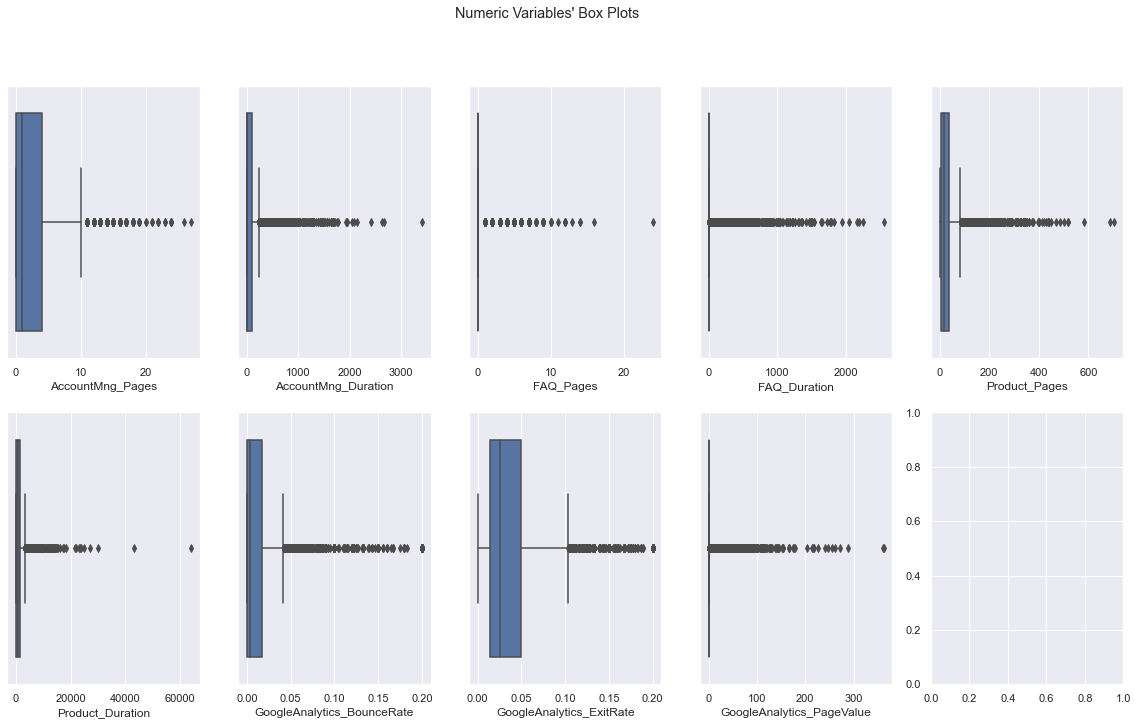

In [36]:
# All Numeric Variables' Box Plots in one figure
sns.set()

# Prepare figure. Create individual axes where each box plot will be placed
fig, axes = plt.subplots(2, ceil(len(metric_features) / 2), figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each box plot:
for ax, feat in zip(axes.flatten(), metric_features): 
    sns.boxplot(x=train[feat], ax=ax)

# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()

In [37]:
train_out = train.copy()

In [38]:
print("initial "+str(len(train_out)))
train_out = train_out[~(train_out['AccountMng_Pages']>=20)] 
print("AccountMng_Pages: "+str(len(train_out)))
train_out = train_out[~(train_out['AccountMng_Duration']>=1500)] 
print("AccountMng_Duration: "+str(len(train_out)))
train_out = train_out[~(train_out['FAQ_Pages']>=10)] 
print("FAQ_Pages: "+str(len(train_out)))
train_out = train_out[~(train_out['FAQ_Duration']>=1200)] 
print("FAQ_Duration: "+str(len(train_out)))
train_out = train_out[~(train_out['Product_Pages']>=300)] 
print("Product_Pages: "+str(len(train_out)))
train_out = train_out[~(train_out['Product_Duration']>=15000)] 
print("Product_Duration: "+str(len(train_out)))
train_out = train_out[~(train_out['GoogleAnalytics_PageValue']>=100)] 
print("GoogleAnalytics_PageValue: "+str(len(train_out)))

initial 9999
AccountMng_Pages: 9984
AccountMng_Duration: 9961
FAQ_Pages: 9949
FAQ_Duration: 9923
Product_Pages: 9889
Product_Duration: 9887
GoogleAnalytics_PageValue: 9820


In [39]:
print('Percentage of data kept after removing outliers:', np.round(len(train_out) / len(train), 5))

Percentage of data kept after removing outliers: 0.9821


In [40]:
def outlier_removal(train):    
    
    without_outliers= (
        (train['AccountMng_Pages']<20)
        &
        (train['AccountMng_Duration']<1500)
        &
        (train['FAQ_Pages']<10)
        &
        (train['FAQ_Duration']<1200)
        &
        (train['Product_Pages']<300)
        &
        (train['Product_Duration']<15000)
        &
        (train['GoogleAnalytics_PageValue']<100)
    )

    train = train[without_outliers]
    return train

## Feature Engeneering

#### Replacing Date by Seasons

In [41]:
def data_op_season(data):    
    data.loc[data.Date.str.contains("Dec") | 
              data.Date.str.contains("Jan")| 
              data.Date.str.contains("Feb"), 'Seasons'] = "Winter"

    data.loc[data.Date.str.contains("Mar") | 
              data.Date.str.contains("Apr")| 
              data.Date.str.contains("May"), 'Seasons'] = "Spring"

    data.loc[data.Date.str.contains("Jun") | 
              data.Date.str.contains("Jul")| 
              data.Date.str.contains("Aug"), 'Seasons'] = "Summer"

    data.loc[data.Date.str.contains("Sep") | 
              data.Date.str.contains("Oct")| 
              data.Date.str.contains("Nov"), 'Seasons'] = "Autumn"
    return data 

In [42]:
test = data_op_season(test)
train = data_op_season(train)

In [43]:
# dropping date (replaced by seasons)
test.drop('Date', axis = 1, inplace = True)
train.drop('Date', axis = 1, inplace = True)

#### Group less used OS into Others

In [44]:
# grouping less used OS into Others
test["OS"].replace({"Fedora": "Other", "Chrome OS": "Other", 'Ubuntu':'Other'}, inplace=True)
train["OS"].replace({"Fedora": "Other", "Chrome OS": "Other", 'Ubuntu':'Other'}, inplace=True)

#### Creating combined Variables

Creating new variables that relate the number of pages viseted by the user with the time spent on each page.
Exemple:
1. AccountMng_Pages - Number of pages visited by the user about account management
2. AccountMng_Duration - Total amount of time (seconds) spent by the user on account management related pages

Try to divide those two variable in order to get the amount of time spent per page.

In [45]:
# creating a function in order to ease up the same process for the test data.
related_features = ['AccountMng_Pages', 'AccountMng_Duration', 'FAQ_Pages', 'FAQ_Duration', 'Product_Pages', 'Product_Duration']

def create_timerelated_variables(data, columns): 
    # the list must be even. 
    if len(columns)%2!=0: 
        print("wrong input")
        return 0
    
    data['AccountMng_Page/Duration'] = data ['AccountMng_Pages'] / data ['AccountMng_Duration']
    data['FAQ_Page/Duration'] = data ['FAQ_Pages'] / data ['FAQ_Duration']
    data['Product_Page/Duration'] = data ['Product_Pages'] / data ['Product_Duration']

    # convert divisions of 0/0 into 0 intead of infinite
    data.loc[~np.isfinite(data['AccountMng_Page/Duration']), 'AccountMng_Page/Duration'] = 0
    data.loc[~np.isfinite(data['FAQ_Page/Duration']), 'FAQ_Page/Duration'] = 0    
    data.loc[~np.isfinite(data['Product_Page/Duration']), 'Product_Page/Duration'] = 0
    
    # converting divisions with null values into zero
    data['AccountMng_Page/Duration'].replace(np.nan, 0, inplace=True)
    data['FAQ_Page/Duration'].replace(np.nan, 0, inplace=True)
    data['Product_Page/Duration'].replace(np.nan, 0, inplace=True)

    return data

In [46]:
train = create_timerelated_variables(train, related_features)
test = create_timerelated_variables(test, related_features)
train_OR = outlier_removal(train)
test_OR = outlier_removal(test)

#### Split the input features from the target on the training dataset

In [47]:
Pre_X = train.drop('Buy', axis = 1)
y = train['Buy']

In [48]:
Pre_X_OR = train_OR.drop('Buy', axis = 1)
y_OR = train_OR['Buy']

### One Hot Encoding 

In [49]:
categorical = ['OS', 'Seasons', 'Type_of_Visitor' ]

In [50]:
# ohc for training data
ohc = OneHotEncoder(sparse=False, drop = None)
ohc_feat_train = ohc.fit_transform(train[categorical])
ohc_feat_names = ohc.get_feature_names()
X_cat = pd.DataFrame(ohc_feat_train, index=train.index, columns=ohc_feat_names)  
X_cat.drop(['x0_Other','x2_Other','x1_Winter'], axis= 1, inplace = True)
# ohc for test data
ohc = OneHotEncoder(sparse=False, drop = None)
ohc_feat_test = ohc.fit_transform(test[categorical])
ohc_feat_names = ohc.get_feature_names()
test_cat = pd.DataFrame(ohc_feat_test, index=test.index, columns=ohc_feat_names)  
test_cat.drop(['x0_Other','x2_Other','x1_Winter'], axis= 1, inplace = True)

#### Train Test Split

In [51]:
X_train, X_val, y_train, y_val = train_test_split(Pre_X,y, test_size = 0.3,
                                                  random_state = 0, stratify = y, shuffle = True)

# Scaling

In [52]:
def scale_join (scale, features,X_train, X_val, test):
    '''Scale(string): Type of scale. If 'minmax' = MinMaxScaler(), if 'minmax2' = MinMaxScaler(feature_range=(-1,1))
    if 'robust' = RobustScaler(), if 'standard = StandardScaler()'
    features(list): features to use on our data set. If you have 2 or more lists use the + sign
    Return (X_train, X_val)'''
    #Put the right scale
    if scale == 'minmax':
        scale = MinMaxScaler()
    elif scale == 'minmax2':
        scale = MinMaxScaler(feature_range=(-1,1))
    elif scale == 'robust':
        scale = RobustScaler()
    elif scale == 'standard':
        scale = StandardScaler()
    elif scale == None: 
        #Joining the scaled numerical features with the categorical ones
        X_train = pd.DataFrame(X_train[features], columns= features, index = X_train.index).join(X_cat)
        X_val = pd.DataFrame(X_train[features], columns= features, index = X_val.index).join(X_cat)
        test = pd.DataFrame(test[features], columns= features, index = test.index).join(test_cat)
        return(X_train, X_val, test)
    else:
        return(print('wrong input on scale'))
    X_train = X_train[features]
    X_val = X_val[features]
    test = test[features]
    # Fit and Transform your train data by applying the scale that was choose before
    scaled_X_train = scale.fit_transform(X_train)
    # Transform your validation data by applying the scale obtained in the previous command
    scaled_X_val = scale.transform(X_val)
    #Transform your test data by applying the scale obtained in the first command
    scaled_test = scale.transform(test)
    #If scale is robust we decided to apply the min max scaler 2 after
    if scale == 'robust':
        scale = MinMaxScaler(feature_range=(-1,1))
        scaled_X_train = scale.fit_transform(scaled_X_train)
        scaled_X_val = scale.transform(scaled_X_val)
        scaled_test = scale.transform(scaled_test)

    #Joining the scaled numerical features with the categorical ones
    X_train = pd.DataFrame(scaled_X_train, columns= features, index = X_train.index).join(X_cat)
    X_val = pd.DataFrame(scaled_X_val, columns= features, index = X_val.index).join(X_cat)
    test = pd.DataFrame(scaled_test, columns= features, index = test.index).join(test_cat)
        
        
    
    return(X_train, X_val, test)

In [53]:
X_cat = pd.DataFrame(ohc_feat_train, index=Pre_X.index, columns=ohc_feat_names) 
X_cat['Type_of_Traffic'] = Pre_X['Type_of_Traffic']
test_cat['Type_of_Traffic'] = test['Type_of_Traffic']
X_cat.drop(['x0_Other','x2_Other','x1_Winter'], axis= 1, inplace = True)

In [54]:
#Checkpoint
X_val_keep = Pre_X.copy()
X_vale_keep_OR = Pre_X_OR.copy()

In [55]:
# insert new features into metric features

metric_features = ['AccountMng_Pages', 'AccountMng_Duration', 'FAQ_Pages', 'FAQ_Duration',
       'Product_Pages', 'Product_Duration', 'GoogleAnalytics_BounceRate',
       'GoogleAnalytics_ExitRate', 'GoogleAnalytics_PageValue', 'AccountMng_Page/Duration', 'FAQ_Page/Duration',
       'Product_Page/Duration']

In [56]:
X, X_val_not_scaled, test = scale_join(None, metric_features, Pre_X, X_val_keep, test)
X_minmax, X_val_not_scaled, test_minmax = scale_join('minmax', metric_features, Pre_X, X_val_keep, test)
X_minmax2, X_val_not_scaled, test_minmax2 = scale_join('minmax2', metric_features, Pre_X, X_val_keep, test)
X_standard, X_val_not_scaled, test_standard = scale_join('standard', metric_features, Pre_X, X_val_keep, test)
X_robust, X_val_not_scaled, test_robust = scale_join('robust', metric_features, Pre_X, X_val_keep, test)

In [57]:
X_OR, X_val_not_scaled, test_OR = scale_join(None, metric_features, Pre_X_OR, X_vale_keep_OR, test_OR)
X_minmax_OR, X_val_not_scaled, test_minmax_OR = scale_join('minmax', metric_features, Pre_X_OR, X_vale_keep_OR, test_OR)
X_minmax2_OR, X_val_not_scaled, test_minmax2_OR = scale_join('minmax2', metric_features, Pre_X_OR, X_vale_keep_OR, test_OR)
X_standard_OR, X_val_not_scaled, test_standard_OR = scale_join('standard', metric_features, Pre_X_OR, X_vale_keep_OR, test_OR)
X_robust_OR, X_val_not_scaled, test_robust_OR = scale_join('robust', metric_features, Pre_X_OR, X_vale_keep_OR, test_OR)

# Feature Selection 

### Feature Selection for Categorical Data - Chi-Square Test

In [149]:
def TestIndependence(X,y,var,alpha=0.05):        
    dfObserved = pd.crosstab(y,X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result)

In [150]:
categorical_features = ['OS', 'Browser', 'Country', 'Type_of_Visitor', 'Type_of_Traffic' ]

In [151]:
for var in Pre_X[categorical_features]:
    TestIndependence(Pre_X[var],y_train, var)

OS is IMPORTANT for Prediction
Browser is NOT an important predictor. (Discard Browser from model)
Country is NOT an important predictor. (Discard Country from model)
Type_of_Visitor is IMPORTANT for Prediction
Type_of_Traffic is IMPORTANT for Prediction


### Feature Selection for Numerical Data 

#### checking for univariate variables

In [152]:
Pre_X[metric_features].var()

AccountMng_Pages              1.116012e+01
AccountMng_Duration           3.229768e+04
FAQ_Pages                     1.636838e+00
FAQ_Duration                  1.954320e+04
Product_Pages                 1.984727e+03
Product_Duration              3.834846e+06
GoogleAnalytics_BounceRate    2.379096e-03
GoogleAnalytics_ExitRate      2.385861e-03
GoogleAnalytics_PageValue     3.516985e+02
AccountMng_Page/Duration      3.062182e-03
FAQ_Page/Duration             2.216605e-03
Product_Page/Duration         4.822194e-03
dtype: float64

#### Spearman correlation

In [153]:
#function to do the heatmap
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
    plt.show()

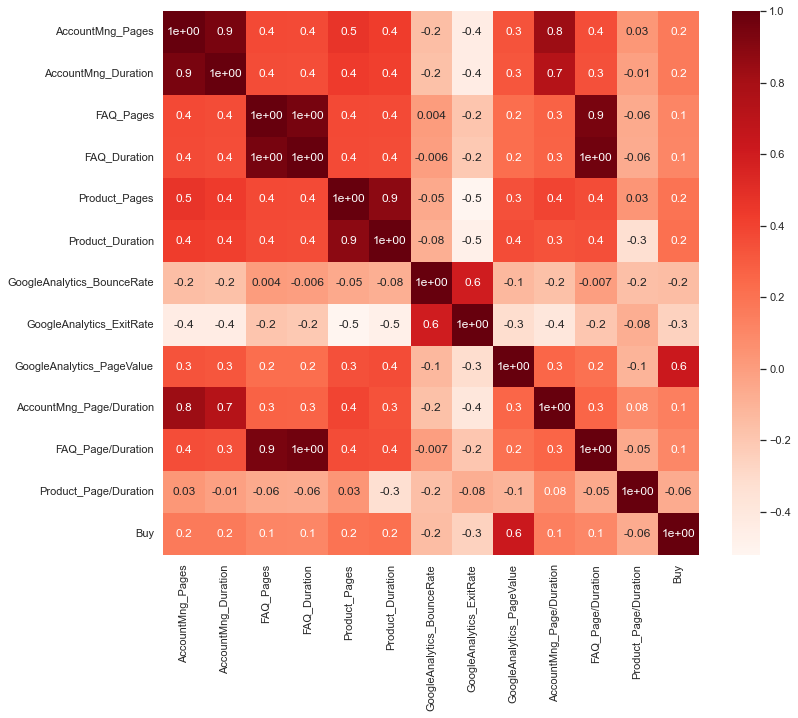

In [154]:
# test spearman corelation features
spear_feat = ['AccountMng_Pages', 'AccountMng_Duration', 'FAQ_Pages', 'FAQ_Duration',
       'Product_Pages', 'Product_Duration', 'GoogleAnalytics_BounceRate',
       'GoogleAnalytics_ExitRate', 'GoogleAnalytics_PageValue',
       'AccountMng_Page/Duration', 'FAQ_Page/Duration',
       'Product_Page/Duration']
#correlation matrix
cor_spearman = X_robust[spear_feat].join(y).corr(method = 'spearman')
#show the heatmap
cor_heatmap(cor_spearman)

#### Lasso

Lasso picked 11 variables and eliminated the other 1 variables


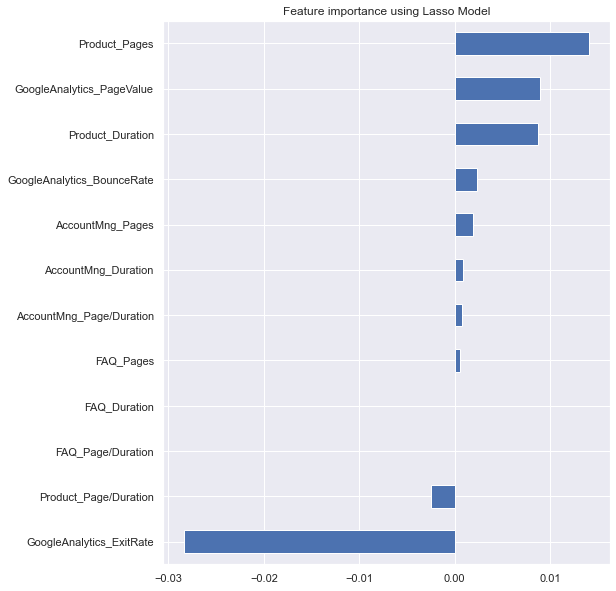

In [155]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

reg = LassoCV()

reg.fit(X_robust[metric_features], y)

coef = pd.Series(reg.coef_, index = X_robust[metric_features].columns)

print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

plot_importance(coef,'Lasso')

#### Decision Tree

In [156]:
gini_importance = DecisionTreeClassifier().fit(X_robust[metric_features], y).feature_importances_
entropy_importance = DecisionTreeClassifier(criterion='entropy').fit(X_robust[metric_features], y).feature_importances_

<AxesSubplot:xlabel='Value', ylabel='Col'>

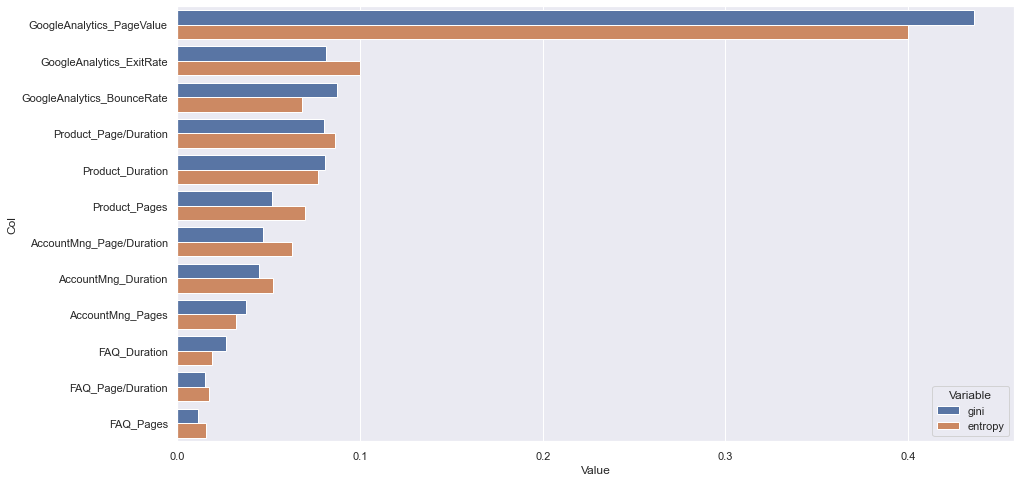

In [157]:
zippy = pd.DataFrame(zip(gini_importance, entropy_importance), columns = ['gini','entropy'])
zippy['col'] = X_robust[metric_features].columns
tidy = zippy.melt(id_vars='col').rename(columns=str.title)
tidy.sort_values(['Value'], ascending = False, inplace = True)

plt.figure(figsize=(15,8))
sns.barplot(y='Col', x='Value', hue='Variable', data=tidy)

#### ANOVA

In [158]:
# apply kfold

skf = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
alpha_list = []
i=0
for train_index, test_index in skf.split(X,y):     
       # get the indexes of the observations assigned for each partition
        X_train, X_val = X.iloc[train_index], X.iloc[test_index]
        y_train, y_val = y.iloc[train_index], y.iloc[test_index]

AccountMng_Pages: 140.197013
Product_Pages: 214.195681
Product_Duration: 191.536269
GoogleAnalytics_BounceRate: 191.081952
GoogleAnalytics_ExitRate: 363.770319
GoogleAnalytics_PageValue: 2458.647662


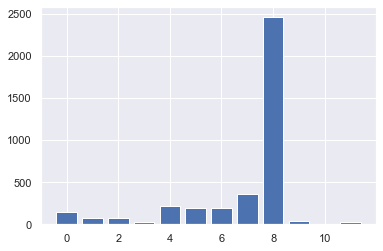

Index(['AccountMng_Pages', 'AccountMng_Duration', 'FAQ_Pages', 'FAQ_Duration',
       'Product_Pages', 'Product_Duration', 'GoogleAnalytics_BounceRate',
       'GoogleAnalytics_ExitRate', 'GoogleAnalytics_PageValue',
       'AccountMng_Page/Duration', 'FAQ_Page/Duration',
       'Product_Page/Duration'],
      dtype='object')

In [159]:
# configure to select all features
fs = SelectKBest(k='all')
# learn relationship from training data
fs.fit(X_train[metric_features], y_train)
# transform train input data
X_train_fs = fs.transform(X_train[metric_features])
# transform test input data
X_test_fs = fs.transform(X_val[metric_features])

# what are scores for the features
for i in range(len(fs.scores_)):
    if fs.scores_[i] >= 100:
        print(X_train[metric_features].columns[i]+': %f' % (fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

X_train[metric_features].columns

### Features selected after analysis

In [39]:
metric_features_keep = ['Product_Pages', 'Product_Duration', 'GoogleAnalytics_BounceRate','GoogleAnalytics_ExitRate', 'GoogleAnalytics_PageValue']
metric_features_try = ['Product_Page/Duration', 'AccountMng_Pages']

# Metrics For Performance Measure

In [40]:
def metrics(X_train, X_val, y_train, pred_train , y_val, pred_val, model):
    print('___________________________________________________________________________________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, pred_train))
    print(confusion_matrix(y_train, pred_train))
    print("Score: "+ str(model.score(X_train, y_train)))
    print("F1 Score: "+ str(f1_score(y_train, pred_train)))

    print('___________________________________________________________________________________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val, pred_val))
    print(confusion_matrix(y_val, pred_val))
    print("Score: "+ str(model.score(X_val, y_val)))
    print("F1 Score: "+ str(f1_score(y_val, pred_val)))

In [41]:
def apply_model(model, X_train_list, X_val_list, y_train, y_val, columns): 
    for i, X_train in enumerate(X_train_list):
        print("###################################### "+str(i)+" ####################################")
        # applies the model 
        model_fit = model.fit(X_train, y_train)
        # predicts training 
        y_pred_train =  model_fit.predict(X_train_list[i])
        #predicts validation 
        y_pred_val = model_fit.predict(X_val_list[i])
        # prints metric results 
        metrics(X_train_list[i], X_val_list[i],y_train, y_pred_train, y_val, y_pred_val, model)

In [42]:
def avg_score(model, data_to_slice, y_to_slice, columns_to_use):
    # apply kfold
    skf = RepeatedStratifiedKFold(n_splits=10, n_repeats=10)
    # create lists to store the results from the different models 
    score_train = []
    score_test = []
    f1_list = []

    for train_index, test_index in skf.split(data_to_slice[columns_to_use],y_to_slice):
        # get the indexes of the observations assigned for each partition
        X_train, X_val = data_to_slice[columns_to_use].iloc[train_index], data_to_slice[columns_to_use].iloc[test_index]
        y_train, y_val = y_to_slice.iloc[train_index], y.iloc[test_index]
        
        # applies the model 
        model_fit = model.fit(X_train, y_train)
        # predicts training 
        y_pred_train =  model_fit.predict(X_train)
        #predicts validation 
        y_pred_val = model_fit.predict(X_val)
        # prints metric results 
        
        #metrics(X_train, X_val, y_train, y_pred_train, y_val, y_pred_val, model)
        
        value_train = model.score(X_train, y_train)
        # check the mean accuracy for the test
        value_test = model.score(X_val,y_val)
        f1_score_val = f1_score(y_val, y_pred_val)
        # append the accuracies, the time and the number of iterations in the corresponding list
        score_train.append(value_train)
        score_test.append(value_test)
        f1_list.append(f1_score_val)
        
    avg_train = round(np.mean(score_train),3)
    avg_test = round(np.mean(score_test),3)
    std_train = round(np.std(score_train),2)
    std_test = round(np.std(score_test),2)
    avg_f1 = round(np.mean(f1_list),3)
    std_f1 = round(np.std(f1_list),2)
    return str(avg_train) + '+/-' + str(std_train),\
            str(avg_test) + '+/-' + str(std_test) , str(avg_f1) + '+/-' + str(std_f1), avg_f1

# Decision Tree Classifier

In [43]:
modelDT = DecisionTreeClassifier()

[0.55, 0.55, 0.549, 0.551, 0.547]


<AxesSubplot:>

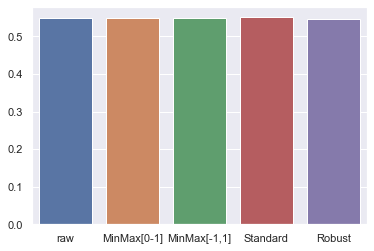

In [44]:
x = ['raw','MinMax[0-1]','MinMax[-1,1]','Standard','Robust']
y_scaled = [avg_score(modelDT, X, y, X.columns)[3],
     avg_score(modelDT, X_minmax, y, X.columns)[3], 
     avg_score(modelDT, X_minmax2, y, X.columns)[3],
     avg_score(modelDT, X_standard, y, X.columns)[3],
     avg_score(modelDT, X_robust, y, X.columns)[3]]


import matplotlib.pyplot as plt
import seaborn as sns

print(y_scaled)
sns.barplot(x, y_scaled)

In [63]:

# apply kfold
skf = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
alpha_list = []
i=0
for train_index, test_index in skf.split(X_standard,y):
     
       # get the indexes of the observations assigned for each partition
    X_train, X_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = y.iloc[train_index], y.iloc[test_index]
    # best alpha 
    dt_alpha = DecisionTreeClassifier(random_state=0)
    path = dt_alpha.cost_complexity_pruning_path(X_train, y_train)
    ccp_alphas, impurities = path.ccp_alphas, path.impurities
    trees = []
    for ccp_alpha in ccp_alphas:
        dt_alpha = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha).fit(X_train, y_train)
        trees.append(dt_alpha)
        train_scores = [tree.score(X_train, y_train) for tree in trees]
        test_scores = [tree.score(X_val, y_val) for tree in trees]
        index_best_model = np.argmax(test_scores)
        best_model = trees[index_best_model]
        alpha_list.append(trees[index_best_model].ccp_alpha)
    

print('ccp_alpha of best model: ',round(np.mean(alpha_list),10))
ccp_alpha_best_model = round(np.mean(alpha_list),10)

ccp_alpha of best model:  0.0002259953


In [64]:
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)

def return_f1score(model, X, y):
    n_scores = cross_val_score(model, X_standard, y, scoring = 'f1', cv = cv)
    return n_scores

def return_results(models):
    results, names = [],[]
    for name, model in models.items():
        scores = return_f1score(model, X_standard, y)
        print("Maximum Score: "+str(max(scores)))
        results.append(scores)
        names.append(name)
        print('>%s %.3f (%.3f)' % (name, scores.mean(), scores.std()))
    
    plt.figure(figsize=(15,7))
    plt.boxplot(results, labels = names, showmeans = True)
    plt.xticks(fontsize=14)
    plt.show()

Maximum Score: 0.5900621118012422
>gini 0.548 (0.024)
Maximum Score: 0.60625
>entropy 0.556 (0.033)


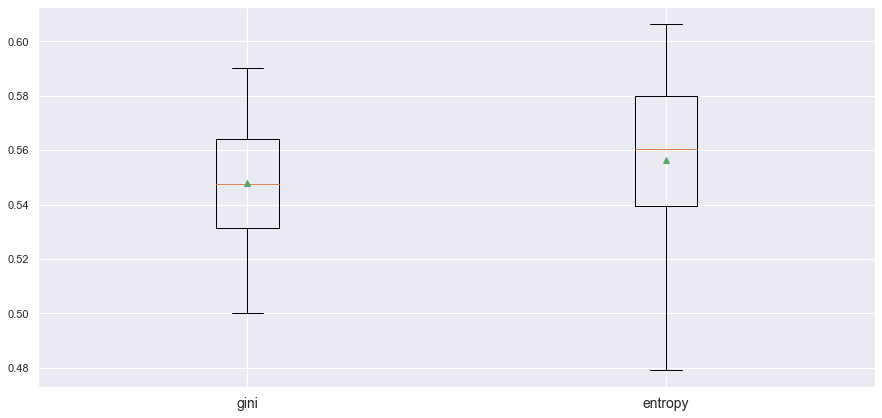

In [65]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = DecisionTreeClassifier(criterion= value, random_state = 15)      
    return models

models = get_models(['gini','entropy'])
return_results(models)

Maximum Score: 0.6868686868686869
>5 0.627 (0.032)
Maximum Score: 0.6577181208053691
>10 0.599 (0.030)
Maximum Score: 0.6246056782334385
>20 0.563 (0.028)
Maximum Score: 0.60625
>50 0.556 (0.033)
Maximum Score: 0.60625
>100 0.556 (0.033)
Maximum Score: 0.60625
>200 0.556 (0.033)
Maximum Score: 0.60625
>300 0.556 (0.033)
Maximum Score: 0.60625
>600 0.556 (0.033)
Maximum Score: 0.60625
>1000 0.556 (0.033)


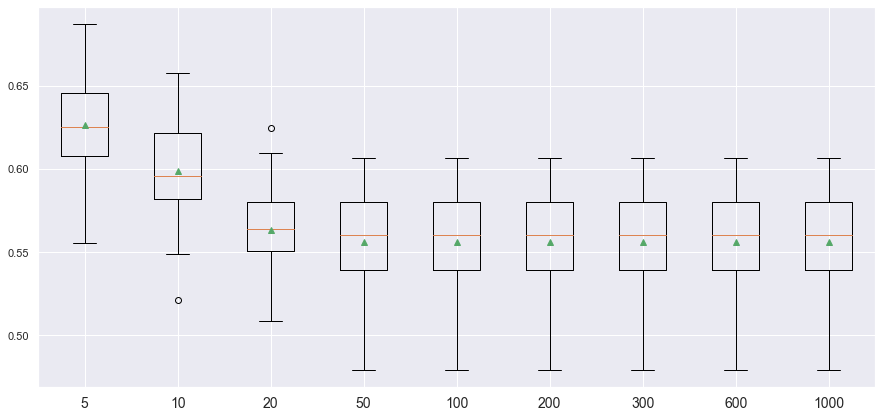

In [66]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = DecisionTreeClassifier(criterion='entropy', max_depth=value, random_state = 15)      
    return models

models = get_models([5,10,20,50,100,200,300,600,1000])
return_results(models)

Maximum Score: 0.7034482758620689
>200 0.626 (0.033)
Maximum Score: 0.7079646017699115
>500 0.665 (0.026)
Maximum Score: 0.6898734177215189
>700 0.649 (0.027)
Maximum Score: 0.6898734177215189
>1000 0.649 (0.027)
Maximum Score: 0.6769230769230771
>2000 0.575 (0.048)
Maximum Score: 0.7010869565217391
>3000 0.661 (0.023)
Maximum Score: 0.7010869565217391
>4000 0.661 (0.023)


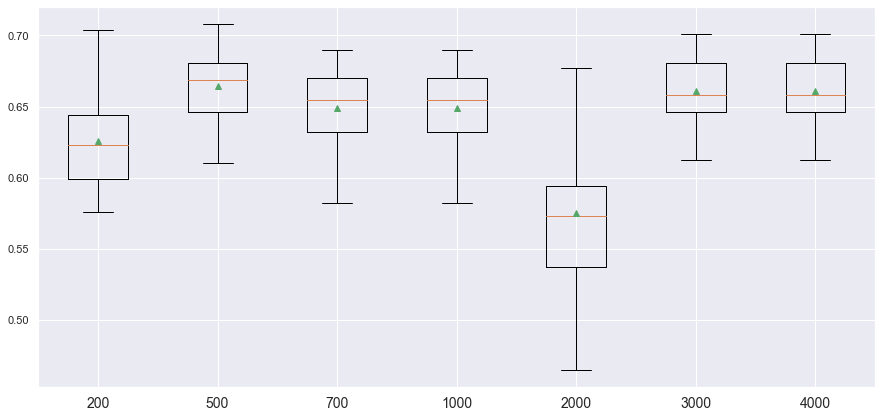

In [67]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split = value, random_state = 15)         
    return models

models = get_models([200,500,700,1000,2000,3000,4000])
return_results(models)

Maximum Score: 0.6577181208053691
>best 0.599 (0.030)
Maximum Score: 0.6353790613718411
>random 0.570 (0.051)


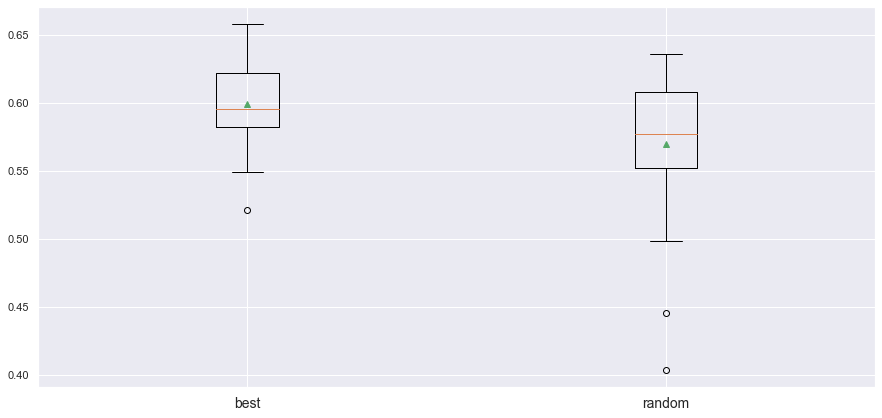

In [68]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state = 15, splitter=value)         
    return models

models = get_models(['best','random'])
return_results(models)

Maximum Score: 0.7010869565217391
>2 0.661 (0.023)
Maximum Score: 0.6031746031746031
>5 0.560 (0.030)
Maximum Score: 0.6707692307692308
>8 0.582 (0.044)
Maximum Score: 0.7079646017699115
>15 0.665 (0.026)
Maximum Score: 0.7079646017699115
>20 0.665 (0.026)
Maximum Score: 0.7079646017699115
>30 0.665 (0.026)
Maximum Score: 0.7079646017699115
>50 0.665 (0.026)
Maximum Score: 0.7079646017699115
>100 0.665 (0.026)


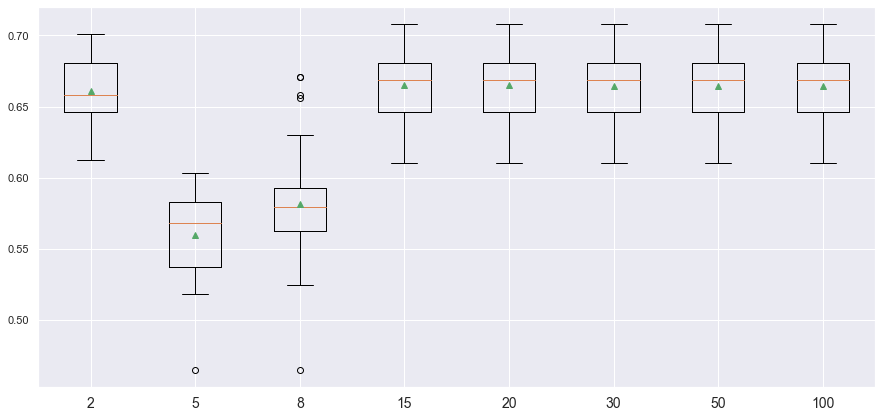

In [69]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split = 500, random_state = 15, splitter='best', max_leaf_nodes=value)                  
    return models

models = get_models([2,5,8,15,20,30,50,100])
return_results(models)

Maximum Score: 0.5836298932384342
>2 0.460 (0.074)
Maximum Score: 0.6666666666666667
>5 0.540 (0.079)
Maximum Score: 0.6909090909090908
>8 0.629 (0.043)
Maximum Score: 0.6969696969696969
>10 0.639 (0.038)
Maximum Score: 0.6985074626865673
>15 0.638 (0.048)
Maximum Score: 0.7079646017699115
>None 0.665 (0.026)


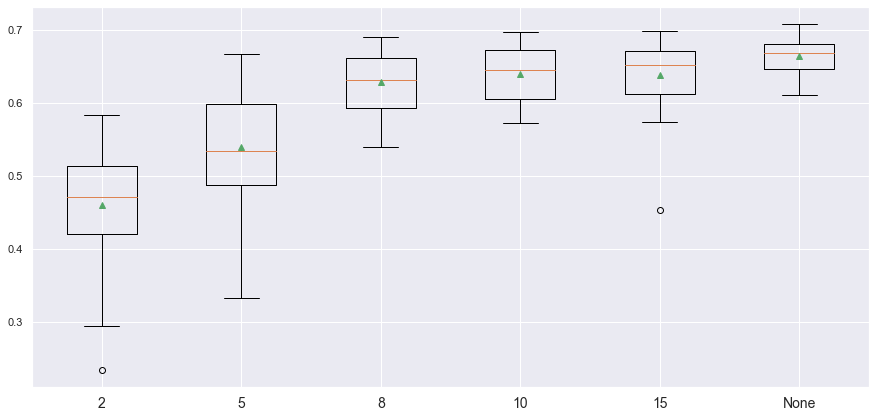

In [70]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split = 500, random_state =15, splitter='best',max_features=value)        
    return models

models = get_models([2,5,8,10,15,None])
return_results(models)

Maximum Score: 0.6037735849056605
>0.001 0.542 (0.031)
Maximum Score: 0.6193548387096774
>0.02 0.551 (0.035)
Maximum Score: 0.6064516129032258
>0.05 0.557 (0.030)
Maximum Score: 0.6433566433566433
>0.1 0.593 (0.033)


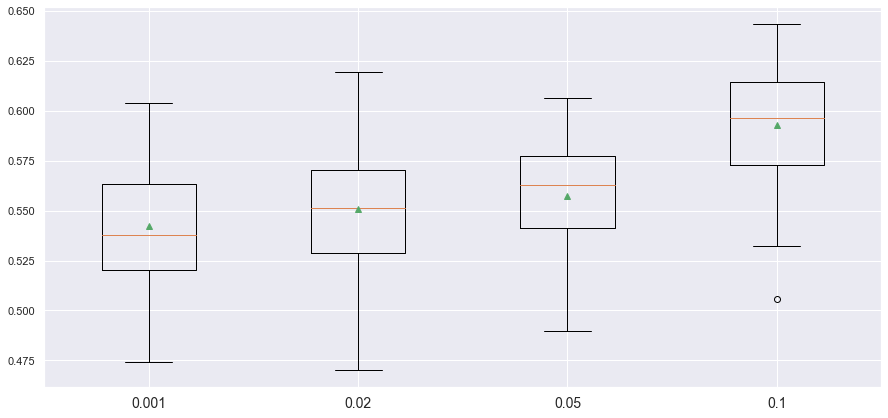

In [203]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = DecisionTreeClassifier(min_impurity_split= value, random_state = 15)      
    return models

models = get_models([0.001, 0.02, 0.05, 0.1])
return_results(models)

### Conclusion

In [67]:
modelDT =DecisionTreeClassifier(ccp_alpha=0.0002259953 , random_state=0, criterion= 'entropy', 
                                max_depth = 5,max_leaf_nodes = 15, splitter = 'best',
                                min_samples_split = 500, max_features = None, min_impurity_split= 0.1)

In [184]:
avg_score(modelDT, X_standard, y, X.columns)

('0.895+/-0.0', '0.891+/-0.01', '0.665+/-0.03', 0.665)

# Random Forest Tree

In [71]:
modelRFT = RandomForestClassifier()

[0.633, 0.634, 0.635, 0.635, 0.632]


<AxesSubplot:>

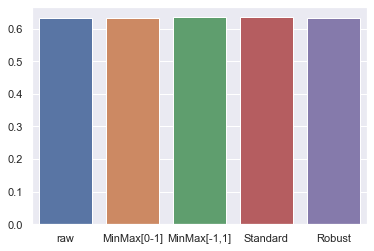

In [72]:
x = ['raw','MinMax[0-1]','MinMax[-1,1]','Standard','Robust']
y_scaled = [avg_score(modelRFT, X, y, X.columns)[3],
     avg_score(modelRFT, X_minmax, y, X.columns)[3], 
     avg_score(modelRFT, X_minmax2, y, X.columns)[3],
     avg_score(modelRFT, X_standard, y, X.columns)[3],
     avg_score(modelRFT, X_robust, y, X.columns)[3]]


import matplotlib.pyplot as plt
import seaborn as sns

print(y_scaled)
sns.barplot(x, y_scaled)

In [105]:
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)

def return_f1score(model, X, y):
    n_scores = cross_val_score(model, X_standard, y, scoring = 'f1', cv = cv)
    return n_scores

def return_results(models):
    results, names = [],[]
    for name, model in models.items():
        scores = return_f1score(model, X_standard, y)
        print("Maximum Score: "+str(max(scores)))
        results.append(scores)
        names.append(name)
        print('>%s %.3f (%.3f)' % (name, scores.mean(), scores.std()))
    
    plt.figure(figsize=(15,7))
    plt.boxplot(results, labels = names, showmeans = True)
    plt.xticks(fontsize=14)
    plt.show()

Maximum Score: 0.6598639455782312
>10 0.593 (0.029)
Maximum Score: 0.697841726618705
>50 0.631 (0.035)
Maximum Score: 0.697841726618705
>80 0.636 (0.036)
Maximum Score: 0.7050359712230215
>100 0.635 (0.036)
Maximum Score: 0.6953405017921147
>150 0.630 (0.033)
Maximum Score: 0.712230215827338
>200 0.635 (0.035)


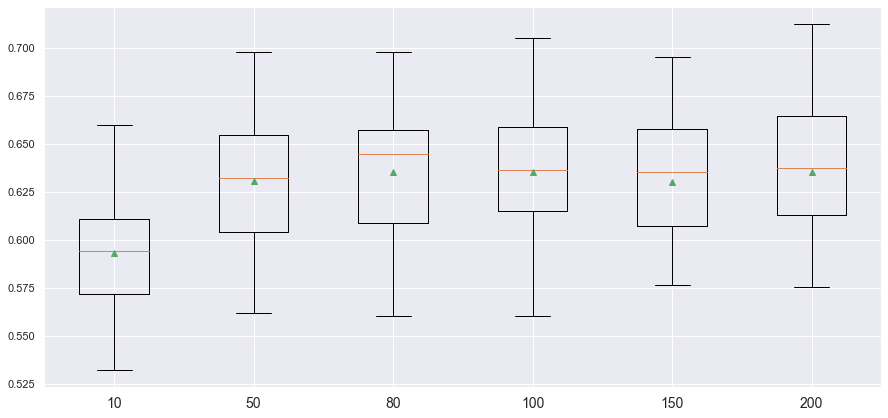

In [106]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = RandomForestClassifier(n_estimators = value, random_state = 15)      
    return models

models = get_models([10,50,80,100,150,200])
return_results(models)

Maximum Score: 0.7050359712230215
>gini 0.635 (0.036)
Maximum Score: 0.697508896797153
>entropy 0.635 (0.033)


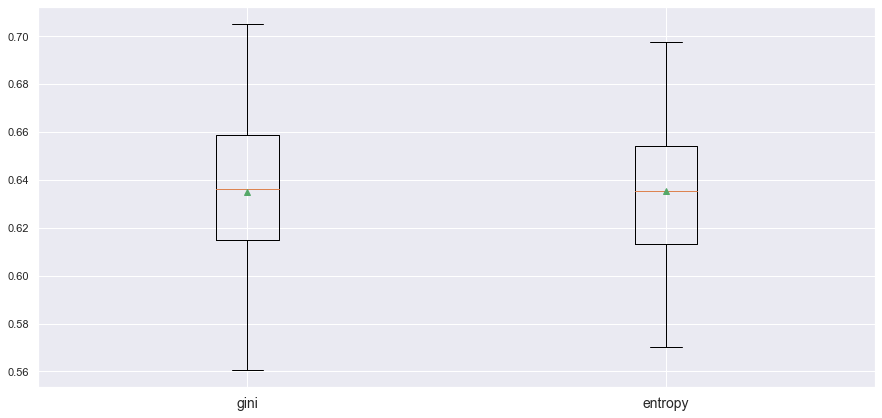

In [107]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = RandomForestClassifier(criterion = value, random_state = 15)      
    return models

models = get_models(['gini', 'entropy'])
return_results(models)

Maximum Score: 0.712230215827338
>10 0.633 (0.041)
Maximum Score: 0.7079037800687286
>20 0.634 (0.033)
Maximum Score: 0.700361010830325
>30 0.635 (0.036)
Maximum Score: 0.7050359712230215
>40 0.635 (0.036)
Maximum Score: 0.7050359712230215
>50 0.635 (0.036)
Maximum Score: 0.7050359712230215
>80 0.635 (0.036)
Maximum Score: 0.7050359712230215
>100 0.635 (0.036)
Maximum Score: 0.7050359712230215
>200 0.635 (0.036)


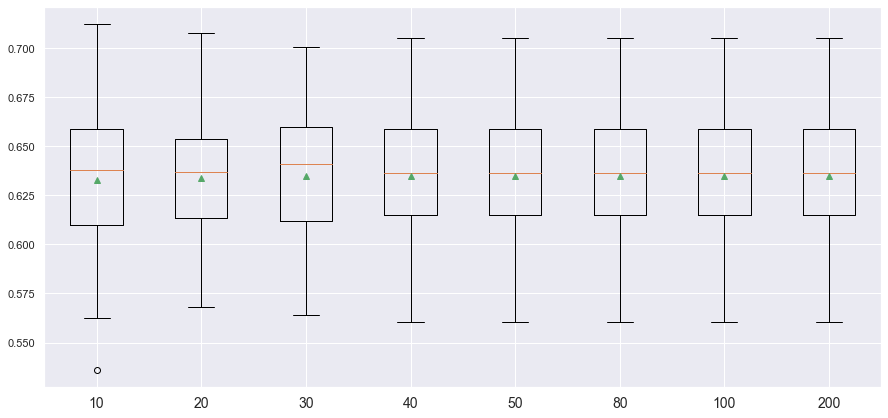

In [108]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = RandomForestClassifier(max_depth = value, random_state = 15)      
    return models

models = get_models([10,20,30,40,50,80,100,200])
return_results(models)

Maximum Score: 0.7050359712230215
>2 0.635 (0.036)
Maximum Score: 0.7092198581560284
>4 0.637 (0.036)
Maximum Score: 0.7042253521126761
>6 0.643 (0.034)
Maximum Score: 0.7054545454545454
>8 0.640 (0.035)
Maximum Score: 0.6953405017921147
>10 0.640 (0.034)
Maximum Score: 0.7172413793103449
>12 0.637 (0.036)
Maximum Score: 0.7034482758620689
>14 0.636 (0.036)
Maximum Score: 0.7000000000000001
>20 0.642 (0.035)


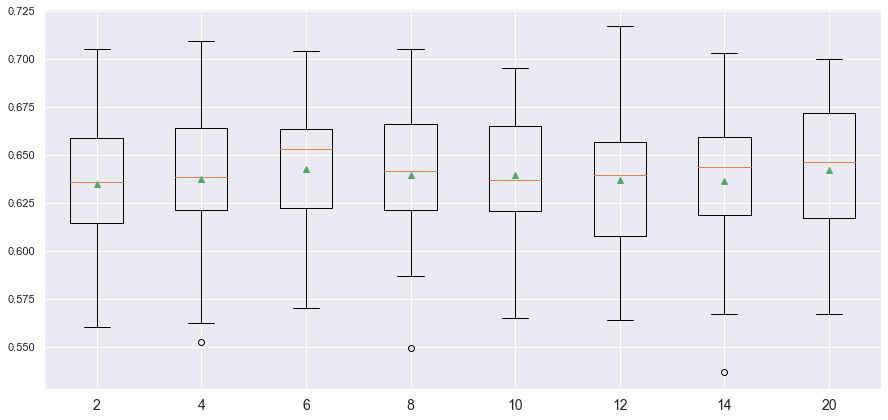

In [109]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = RandomForestClassifier(min_samples_split = value, random_state = 15)      
    return models

models = get_models([2,4,6,8,10,12,14,20])
return_results(models)

Maximum Score: 0.7050359712230215
>1 0.635 (0.036)
Maximum Score: 0.6956521739130435
>2 0.638 (0.032)
Maximum Score: 0.6923076923076923
>3 0.639 (0.032)
Maximum Score: 0.6861313868613139
>4 0.637 (0.035)
Maximum Score: 0.7157894736842105
>5 0.639 (0.032)


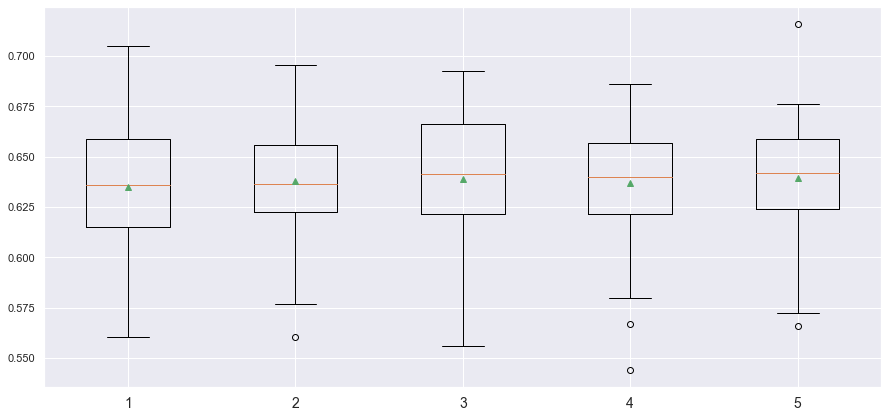

In [110]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = RandomForestClassifier(min_samples_leaf = value, random_state = 15)      
    return models

models = get_models([1,2,3,4,5])
return_results(models)

Maximum Score: 0.7050359712230215
>auto 0.635 (0.036)
Maximum Score: 0.7050359712230215
>sqrt 0.635 (0.036)
Maximum Score: 0.7050359712230215
>log2 0.635 (0.036)


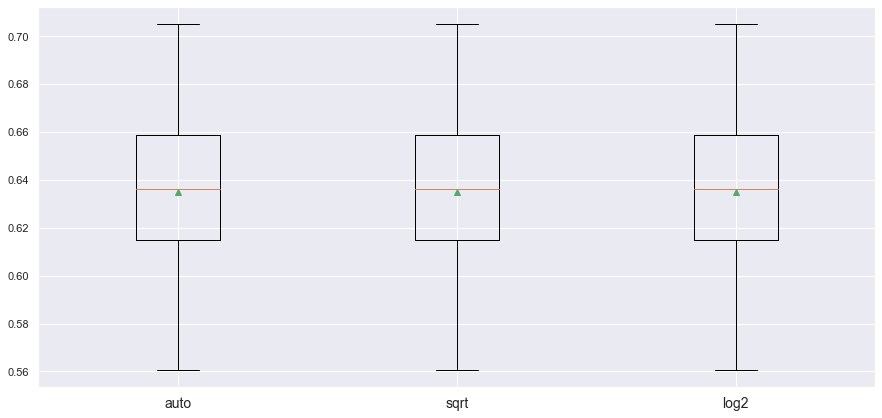

In [111]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = RandomForestClassifier(max_features = value, random_state = 15)      
    return models

models = get_models(['auto', 'sqrt', 'log2'])
return_results(models)

Maximum Score: 0.7050359712230215
>True 0.635 (0.036)
Maximum Score: 0.7050359712230215
>False 0.635 (0.036)


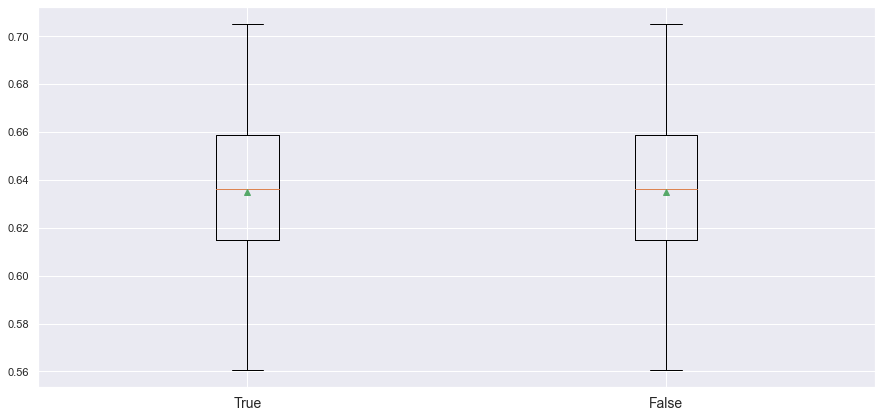

In [112]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = RandomForestClassifier(warm_start = value, random_state = 15)      
    return models

models = get_models([True, False])
return_results(models)

Maximum Score: 0.7050359712230215
>True 0.635 (0.036)
Maximum Score: 0.705084745762712
>False 0.627 (0.034)


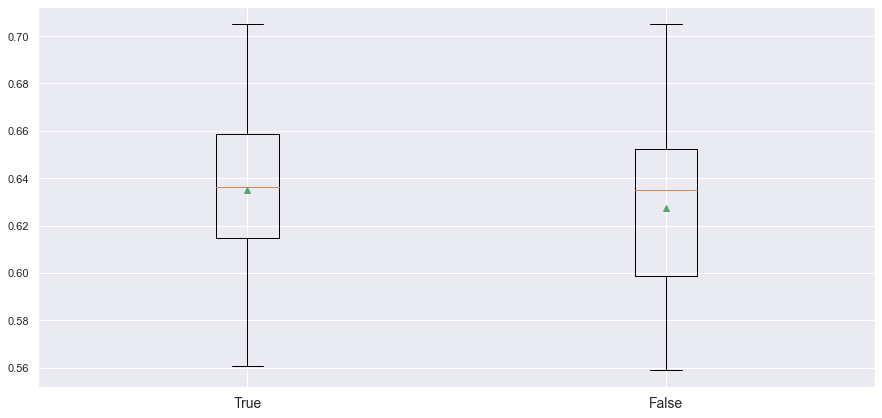

In [113]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = RandomForestClassifier(bootstrap = value, random_state = 15)      
    return models

models = get_models([True, False])
return_results(models)

Maximum Score: 0.6691449814126395
>balanced 0.611 (0.036)
Maximum Score: 0.6810035842293908
>balanced_subsample 0.610 (0.033)


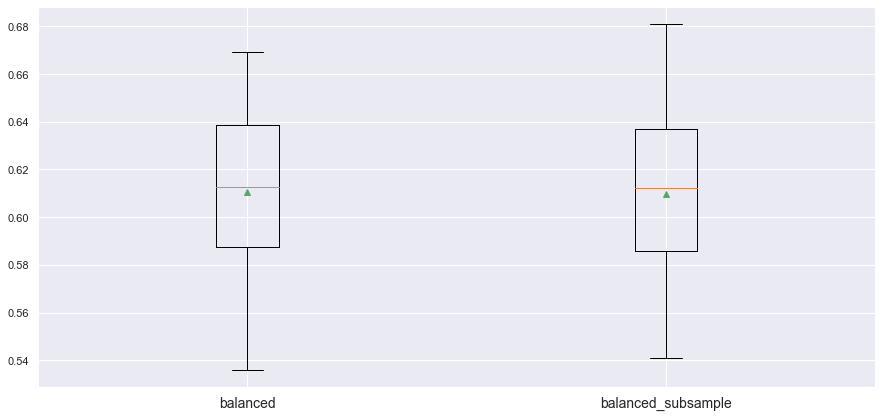

In [114]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = RandomForestClassifier(class_weight = value, random_state = 15)      
    return models

models = get_models(['balanced', 'balanced_subsample'])
return_results(models)

Maximum Score: 0.7050359712230215
>0 0.635 (0.036)
Maximum Score: 0.490909090909091
>0.005 0.280 (0.076)
Maximum Score: 0.6931407942238267
>0.0005 0.634 (0.037)
Maximum Score: 0.7000000000000001
>5e-05 0.635 (0.036)
Maximum Score: 0.7050359712230215
>5e-06 0.635 (0.036)


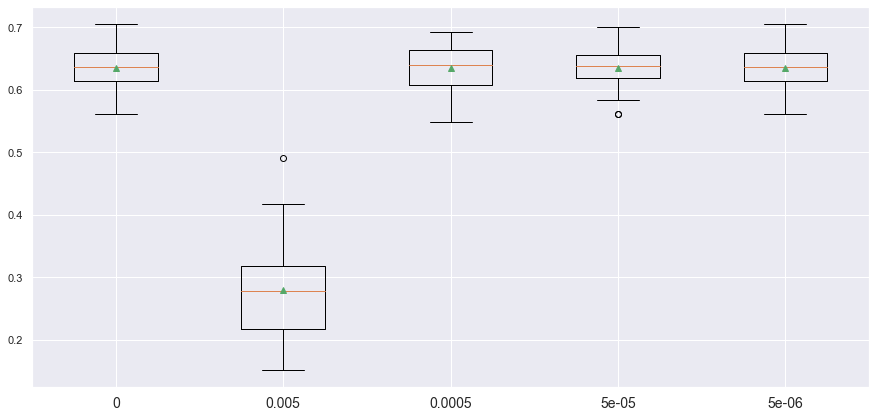

In [115]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = RandomForestClassifier(ccp_alpha = value, random_state = 15)      
    return models

models = get_models([0,0.005,0.0005,0.00005,0.000005])
return_results(models)

### GridSearch

In [ ]:
param_grid = {
    'bootstrap': [True, False],
    'class_weight' = ['balanced', 'balanced_subsample'],
    'criterion' = ['gini', 'entropy']
    'max_depth': [10, 20, 30, 40],
    'max_features': ['auto', 'sqrt', 'log2'],
    'warm_start': [True, False],
    'n_estimators': [30, 40, 100, 200]
}
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = modelRFT, param_grid = param_grid, scoring = 'f1')

grid_search.fit(X_robust, y)
grid_search.best_params_

### Conclusion (graphic)

In [68]:
modelRFT = RandomForestClassifier(ccp_alpha =5e-06,
                                 class_weight = 'balanced',
                                 bootstrap = True,
                                 min_samples_leaf = 5,
                                 min_samples_split = 6,
                                 max_depth = 30,
                                 criterion = 'gini',
                                 n_estimators = 80,
                                 max_features='auto',
                                 warm_start=False)

In [118]:
avg_score(modelRFT, X_standard, y, X.columns)

('0.938+/-0.0', '0.886+/-0.01', '0.673+/-0.02', 0.673)

### Conclusion (GridSearch)

In [115]:
modelRFT = RandomForestClassifier(bootstrap = True, class_weight = 'balanced_subsample',
                                 criterion = 'gini', max_depth = 10, max_features = 'log2',
                                 n_estimators = 100, warm_start = False)

In [116]:
avg_score(modelRFT, X_standard, y, X.columns)

('0.919+/-0.0', '0.88+/-0.01', '0.667+/-0.03', 0.667)

# Model - Linear Discriminant Analysis

In [43]:
modelLDA = LDA()

[0.458, 0.459, 0.457, 0.457, 0.457]


<AxesSubplot:>

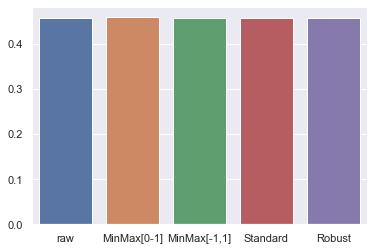

In [73]:
x = ['raw','MinMax[0-1]','MinMax[-1,1]','Standard','Robust']
y_scaled = [avg_score(modelLDA, X, y, X.columns)[3],
     avg_score(modelLDA, X_minmax, y, X.columns)[3], 
     avg_score(modelLDA, X_minmax2, y, X.columns)[3],
     avg_score(modelLDA, X_standard, y, X.columns)[3],
     avg_score(modelLDA, X_robust, y, X.columns)[3]]


import matplotlib.pyplot as plt
import seaborn as sns

print(y_scaled)
sns.barplot(x, y_scaled)

In [44]:
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)

def return_f1score(model, X, y):
    n_scores = cross_val_score(model, X_minmax, y, scoring = 'f1', cv = cv)
    return n_scores

def return_results(models):
    results, names = [],[]
    for name, model in models.items():
        scores = return_f1score(model, X_minmax, y)
        print("Maximum Score: "+str(max(scores)))
        results.append(scores)
        names.append(name)
        print('>%s %.3f (%.3f)' % (name, scores.mean(), scores.std()))
    
    plt.figure(figsize=(15,7))
    plt.boxplot(results, labels = names, showmeans = True)
    plt.xticks(fontsize=14)
    plt.show()

Maximum Score: nan
>svd nan (nan)
Maximum Score: nan
>lsqr nan (nan)
Maximum Score: nan
>eigen nan (nan)


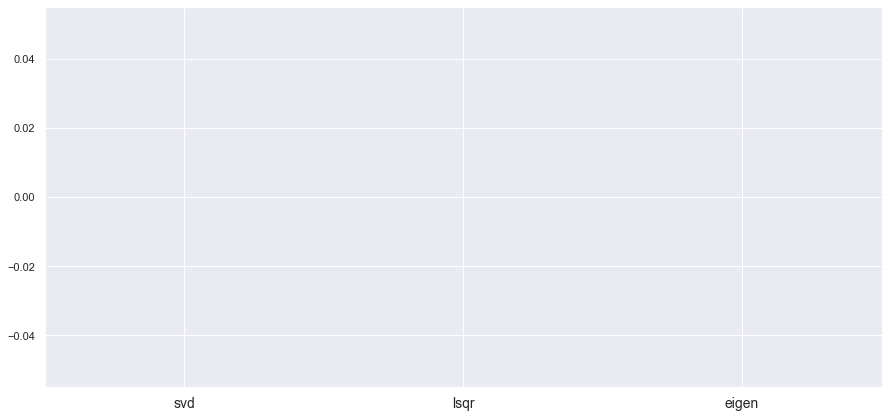

In [48]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = LDA(solver=values)     
    return models

models = get_models(['svd', 'lsqr', 'eigen'])
return_results(models)

Maximum Score: nan
>auto nan (nan)
Maximum Score: nan
>None nan (nan)


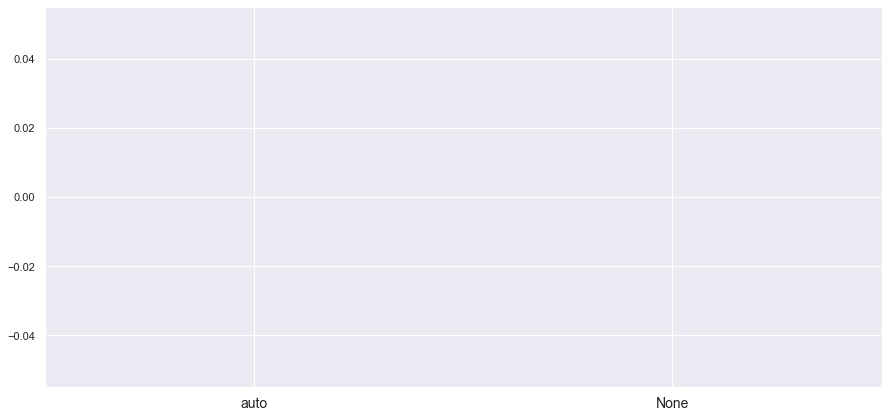

In [49]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = LDA(shrinkage=values)     
    return models

models = get_models(['auto', None])
return_results(models)

Maximum Score: nan
>3 nan (nan)
Maximum Score: nan
>5 nan (nan)
Maximum Score: nan
>7 nan (nan)
Maximum Score: nan
>None nan (nan)


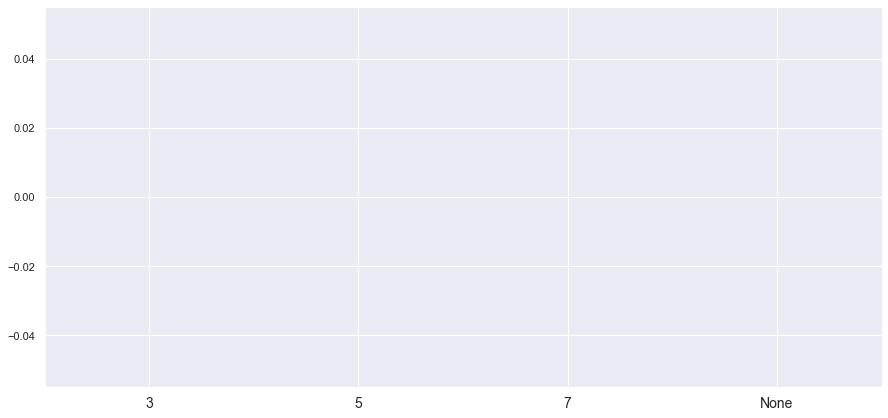

In [50]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = LDA(n_components=values)     
    return models

models = get_models([3,5,7,None])
return_results(models)

Maximum Score: 0.5327510917030568
>True 0.456 (0.044)
Maximum Score: 0.5327510917030568
>False 0.456 (0.044)


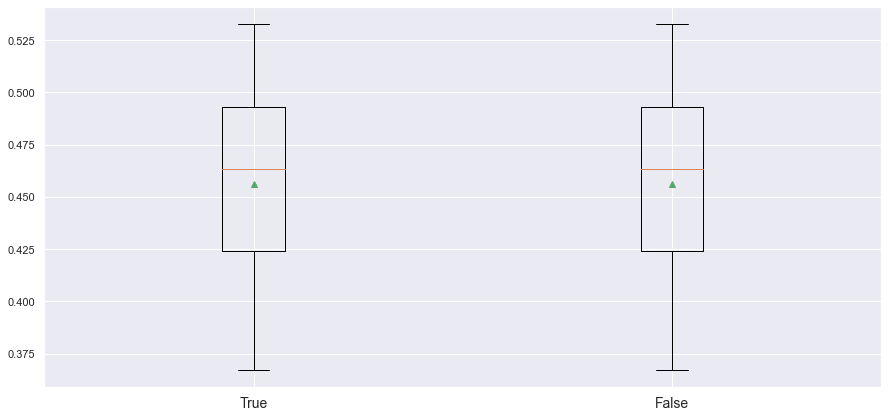

In [51]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = LDA(store_covariance=values)     
    return models

models = get_models([True, False])
return_results(models)

### Conclusion

In [69]:
modelLDA = LDA()

In [46]:
avg_score(modelLDA, X_minmax, y, X.columns)

('0.88+/-0.0', '0.879+/-0.01', '0.459+/-0.04', 0.459)

# Quadratic Discriminant Analysis

In [70]:
modelQDA = QDA()

[0.633, 0.634, 0.633, 0.633, 0.632]


<AxesSubplot:>

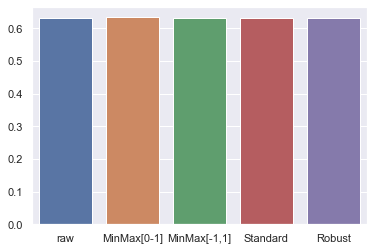

In [74]:
x = ['raw','MinMax[0-1]','MinMax[-1,1]','Standard','Robust']
y_scaled = [avg_score(modelRFT, X, y, X.columns)[3],
     avg_score(modelRFT, X_minmax, y, X.columns)[3], 
     avg_score(modelRFT, X_minmax2, y, X.columns)[3],
     avg_score(modelRFT, X_standard, y, X.columns)[3],
     avg_score(modelRFT, X_robust, y, X.columns)[3]]


import matplotlib.pyplot as plt
import seaborn as sns

print(y_scaled)
sns.barplot(x, y_scaled)

### Conclusion

In [48]:
avg_score(modelQDA, X_minmax, y, X.columns)

('0.781+/-0.01', '0.777+/-0.02', '0.506+/-0.02', 0.506)

# GradientBoosting

In [54]:
modelGB = GradientBoostingClassifier()

[0.646, 0.646, 0.647, 0.647, 0.647]


<AxesSubplot:>

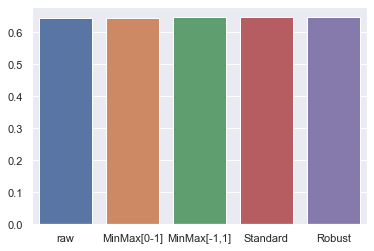

In [75]:
x = ['raw','MinMax[0-1]','MinMax[-1,1]','Standard','Robust']
y_scaled = [avg_score(modelGB, X, y, X.columns)[3],
     avg_score(modelGB, X_minmax, y, X.columns)[3], 
     avg_score(modelGB, X_minmax2, y, X.columns)[3],
     avg_score(modelGB, X_standard, y, X.columns)[3],
     avg_score(modelGB, X_robust, y, X.columns)[3]]


import matplotlib.pyplot as plt
import seaborn as sns

print(y_scaled)
sns.barplot(x, y_scaled)

In [56]:
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)

def return_f1score(model, X, y):
    n_scores = cross_val_score(model, X_robust, y, scoring = 'f1', cv = cv)
    return n_scores

def return_results(models):
    results, names = [],[]
    for name, model in models.items():
        scores = return_f1score(model, X_robust, y)
        print("Maximum Score: "+str(max(scores)))
        results.append(scores)
        names.append(name)
        print('>%s %.3f (%.3f)' % (name, scores.mean(), scores.std()))
    
    plt.figure(figsize=(15,7))
    plt.boxplot(results, labels = names, showmeans = True)
    plt.xticks(fontsize=14)
    plt.show()

Maximum Score: 0.0
>0.001 0.000 (0.000)
Maximum Score: 0.5502183406113538
>0.01 0.477 (0.037)
Maximum Score: 0.726027397260274
>0.1 0.651 (0.032)
Maximum Score: 0.6944444444444444
>0.3 0.640 (0.034)
Maximum Score: 0.6829268292682927
>0.5 0.620 (0.032)
Maximum Score: 0.6601941747572816
>0.8 0.605 (0.031)
Maximum Score: 0.6754966887417219
>1.0 0.605 (0.033)


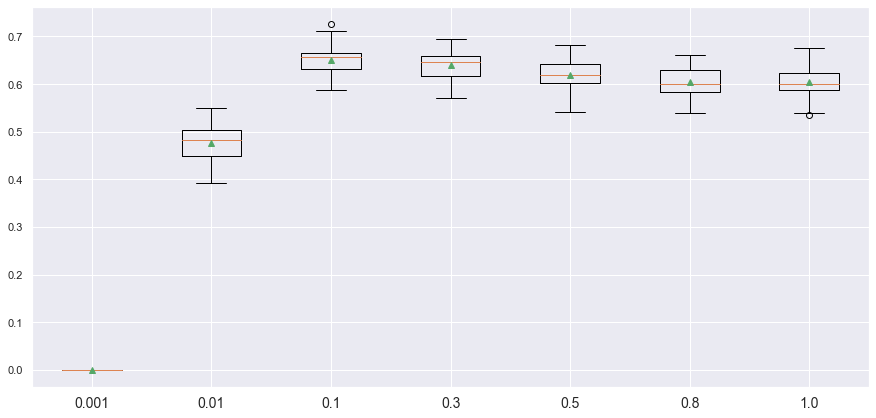

In [57]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = GradientBoostingClassifier(learning_rate = value, random_state = 15)      
    return models

models = get_models([0.001, 0.01, 0.1, 0.3, 0.5, 0.8, 1.0])
return_results(models)

Maximum Score: 0.0
>0.001 0.000 (0.000)
Maximum Score: 0.7014925373134328
>0.01 0.651 (0.031)
Maximum Score: 0.698961937716263
>0.1 0.640 (0.032)
Maximum Score: 0.688888888888889
>0.3 0.629 (0.032)
Maximum Score: 0.6910299003322259
>0.5 0.611 (0.036)
Maximum Score: 0.6824324324324325
>0.8 0.597 (0.033)
Maximum Score: 0.6555183946488294
>1.0 0.590 (0.040)


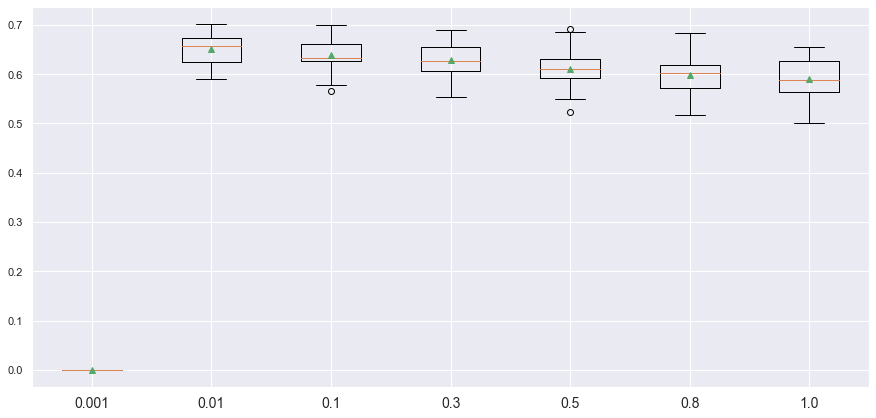

In [58]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = GradientBoostingClassifier(learning_rate = value, random_state = 15, n_estimators = 500)      
    return models

models = get_models([0.001, 0.01, 0.1, 0.3, 0.5, 0.8, 1.0])
return_results(models)

Maximum Score: 0.0
>2 0.000 (0.000)
Maximum Score: 0.0
>5 0.000 (0.000)
Maximum Score: 0.5555555555555556
>10 0.502 (0.038)
Maximum Score: 0.6838235294117647
>20 0.611 (0.038)
Maximum Score: 0.7042253521126761
>30 0.642 (0.034)
Maximum Score: 0.7058823529411766
>50 0.651 (0.032)
Maximum Score: 0.726027397260274
>100 0.651 (0.032)
Maximum Score: 0.7142857142857143
>150 0.648 (0.035)
Maximum Score: 0.7079037800687286
>200 0.645 (0.032)
Maximum Score: 0.698961937716263
>500 0.640 (0.032)


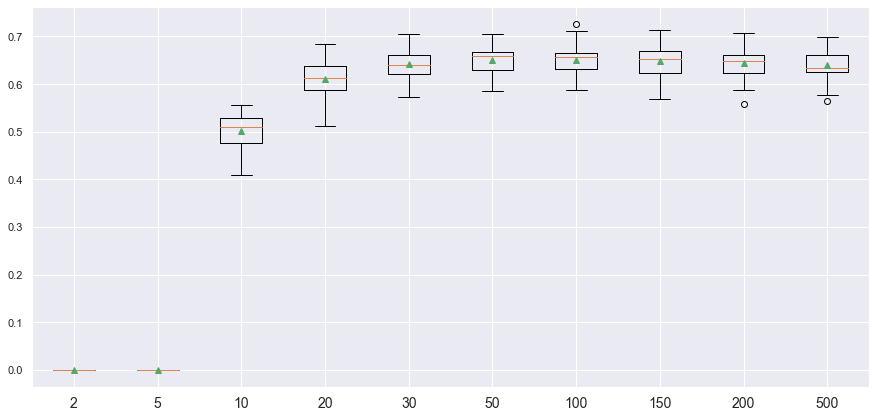

In [59]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = GradientBoostingClassifier(n_estimators = value, random_state = 15)      
    return models

models = get_models([2,5,10,20,30,50,100,150,200,500])
return_results(models)

Maximum Score: 0.7128027681660901
>0.2 0.640 (0.030)
Maximum Score: 0.7248322147651006
>0.4 0.642 (0.032)
Maximum Score: 0.7083333333333333
>0.6 0.645 (0.035)
Maximum Score: 0.7087719298245613
>0.8 0.649 (0.030)
Maximum Score: 0.726027397260274
>1.0 0.651 (0.032)


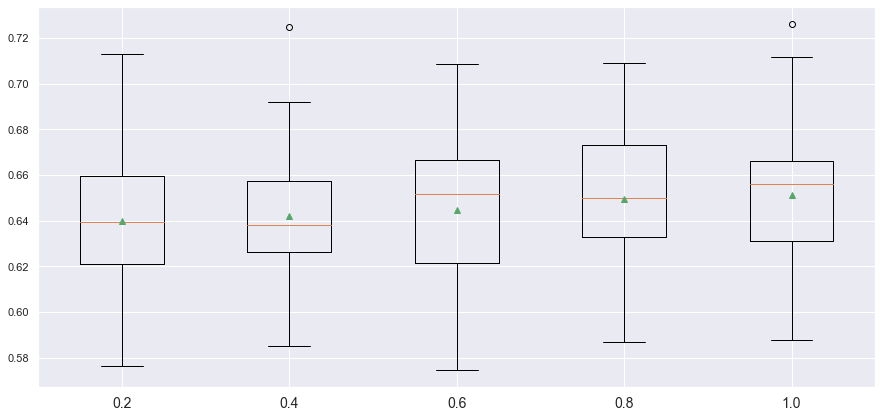

In [60]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = GradientBoostingClassifier(subsample = value, random_state = 15)      
    return models

models = get_models([0.2,0.4,0.6,0.8,1.0])
return_results(models)

Maximum Score: 0.702127659574468
>2 0.633 (0.032)
Maximum Score: 0.7094594594594594
>0.5 0.650 (0.032)
Maximum Score: 0.7242524916943522
>sqrt 0.650 (0.029)
Maximum Score: 0.7242524916943522
>log2 0.650 (0.029)
Maximum Score: 0.726027397260274
>None 0.651 (0.032)


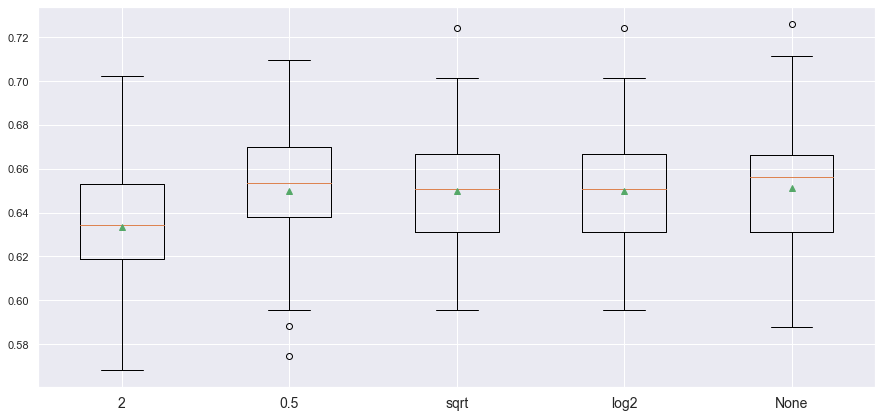

In [61]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = GradientBoostingClassifier(max_features = value, random_state = 15)      
    return models

models = get_models([2,0.5,'sqrt','log2',None])
return_results(models)

### Conclusion

In [71]:
modelGB = GradientBoostingClassifier(learning_rate = 0.1,n_estimators = 100,
                                    subsample = 1, max_features = None )

In [196]:
avg_score(modelGB, X_robust, y, X.columns)

('0.922+/-0.0', '0.902+/-0.01', '0.65+/-0.03', 0.65)

# Neural Networks

In [76]:
modelNN=MLPClassifier()

[0.129, 0.141, 0.136, 0.14, 0.139]


<AxesSubplot:>

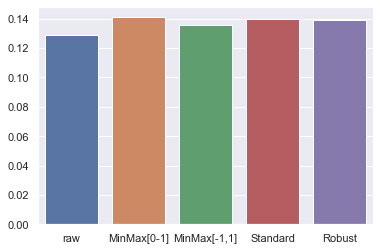

In [87]:
x = ['raw','MinMax[0-1]','MinMax[-1,1]','Standard','Robust']
y_scaled = [avg_score(modelNN, X_OR, y_OR, X_OR.columns)[3],
     avg_score(modelNN, X_minmax_OR, y_OR, X_OR.columns)[3], 
     avg_score(modelNN, X_minmax2_OR, y_OR, X_OR.columns)[3],
     avg_score(modelNN, X_standard_OR, y_OR, X_OR.columns)[3],
     avg_score(modelNN, X_robust_OR, y_OR, X_OR.columns)[3]]


import matplotlib.pyplot as plt
import seaborn as sns

print(y_scaled)
sns.barplot(x, y_scaled)

In [170]:
featuresNN = ['Product_Pages', 'GoogleAnalytics_ExitRate',
       'GoogleAnalytics_PageValue', 'x0_Android', 'x0_MacOSX', 'x0_Windows',
       'x0_iOS', 'x2_New_Access', 'x2_Returner', 'x1_Autumn', 'x1_Spring',
       'x1_Summer']
skf = RepeatedStratifiedKFold(n_splits=10, n_repeats=10)

for train_index, test_index in skf.split(X_minmax[featuresNN],y):
        # get the indexes of the observations assigned for each partition
        X_train, X_val = X_minmax[featuresNN].iloc[train_index], X_minmax[featuresNN].iloc[test_index]
        y_train, y_val = y.iloc[train_index], y.iloc[test_index] 
        

In [ ]:
parameter_space = {
    'hidden_layer_sizes': [(6,6,6,6)],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001,0.01],
    'learning_rate_init':[0.001, 0.1, 0.0001],
    'learning_rate': ['adaptive']
}


clf = GridSearchCV(modelNN, parameter_space, scoring = 'f1')

clf.fit(X_train, y_train)
clf.best_params_

In [ ]:
parameter_space = {
    'hidden_layer_sizes': [(6,6,6,6)],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.0001],
    'learning_rate_init':[0.15, 0.1, 0.09],
    'learning_rate': ['adaptive']
}


clf = GridSearchCV(modelNN, parameter_space, scoring = 'f1')

clf.fit(X_train, y_train)
clf.best_params_

In [ ]:
parameter_space = {
    'hidden_layer_sizes': [(6,6,6),(15,15,15),(3,3,3),(1,1,1),(30,30,30)],
    'activation': ['relu'],
    'solver': ['adam'],
    'max_iter':[500]
}


clf = GridSearchCV(modelNN, parameter_space, scoring = 'f1')

clf.fit(X_train, y_train)
clf.best_params_

In [ ]:
parameter_space = {
    'hidden_layer_sizes': [(2,2,2),(3,3,3),(1,1,1),(4,4,4),(5,5,5)],
    'activation': ['relu'],
    'solver': ['adam'],
    'max_iter':[500]
}


clf = GridSearchCV(modelNN, parameter_space, scoring = 'f1')

clf.fit(X_train, y_train)
clf.best_params_

In [ ]:
parameter_space = {
    'hidden_layer_sizes': [(83,83,83),(75,75,75),(80,80,80),(82,82,82),(77,77,77)],
    'activation': ['relu'],
    'solver': ['sgd'],
    'max_iter':[500],
    'learning_rate':['adaptive']
}


clf = GridSearchCV(modelNN, parameter_space, scoring = 'f1')

clf.fit(X_train, y_train)
clf.best_params_

In [ ]:
parameter_space = {
    'hidden_layer_sizes': [(75,75,75)],
    'activation': ['relu'],
    'solver': ['sgd'],
    'max_iter':[500],
    'learning_rate':['adaptive'],
}


clf = GridSearchCV(modelNN, parameter_space, scoring = 'f1')

clf.fit(X_train, y_train)
clf.best_params_

In [ ]:
parameter_space = {
    'hidden_layer_sizes': [(75,75,75)],
    'activation': ['relu'],
    'solver': ['sgd'],
    'max_iter':[500],
    'learning_rate':['adaptive'],
    'learning_rate_init':[0.001,0.01,0.0001]
}


clf = GridSearchCV(modelNN, parameter_space, scoring = 'f1')

clf.fit(X_train, y_train)
clf.best_params_

### Conclusion

In [72]:
modelNN=MLPClassifier(hidden_layer_sizes=(4,4,4),max_iter=500, activation='relu',solver='adam',random_state=0)

In [172]:
avg_score(modelNN, X_minmax, y, featuresNN)

('0.893+/-0.0', '0.892+/-0.01', '0.647+/-0.03', 0.647)

# Stacking

In [ ]:
modelDT =DecisionTreeClassifier(ccp_alpha=0.0002259953 , random_state=0, criterion= 'entropy', 
                                max_depth = 5,max_leaf_nodes = 15, splitter = 'best',
                                min_samples_split = 500, max_features = None, min_impurity_decrease= 0.1)

modelRFT = RandomForestClassifier(ccp_alpha =5e-06,
                                 class_weight = 'balanced',
                                 bootstrap = True,
                                 min_samples_leaf = 5,
                                 min_samples_split = 6,
                                 max_depth = 30,
                                 criterion = 'gini',
                                 n_estimators = 80,
                                 max_features='auto',
                                 warm_start=False)

modelNN=MLPClassifier(hidden_layer_sizes=(4,4,4),max_iter=500, activation='relu',solver='adam',random_state=0)


modelGB = GradientBoostingClassifier(learning_rate = 0.1,n_estimators = 100,
                                    subsample = 1, max_features = None )

### Hand-made Stacking

In [ ]:
skf = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
f1_list = []
i=1



for train_index, test_index in skf.split(X,y):     
    # get the indexes of the observations assigned for each partition
    X_train, X_val = X_robust.iloc[train_index], X_robust.iloc[test_index]
    y_train, y_val = y.iloc[train_index], y.iloc[test_index]

    # special minmax for Neural Networks
    X_train_MM, X_val_MM = X_minmax.iloc[train_index], X_minmax.iloc[test_index]
      
    # fitting the Decision Tree model
    model_fit = modelDT.fit(X_train, y_train)
    DTlabels_val = model_fit.predict(X_val)
    # fitting the Random Forest Model 
    model_fit = modelRFT.fit(X_train, y_train)
    RFTlabels_val = model_fit.predict(X_val)  
    # fitting th Grandient Booster model 
    model_fit = modelGB.fit(X_train, y_train)
    GBlabels_val = model_fit.predict(X_val)
    # fitting the NN Model 
    model_fit = modelNN.fit(X_train_MM[featuresNN], y_train)
    NNlabels_val = model_fit.predict(X_val_MM[featuresNN])

    # creating the dataframe that holds the labels of each algo 
    lables_df=pd.DataFrame({'DT':DTlabels_val,'RFT':RFTlabels_val, 'GB':GBlabels_val, 'NN':NNlabels_val}) 
    lables_df['Final'] = np.nan

    # the majority label decides the final result 
    lables_df['Final'] = np.nan

    for i, value in enumerate(lables_df.DT):
        if 0.175 * lables_df.DT[i] + 0.35 * lables_df.RFT[i] + 0.175 * lables_df.GB[i] + 0.25 * lables_df.NN[i] >= 0.5:
                        lables_df['Final'][i] = 1 
        else:
                lables_df['Final'][i] = 0

       # calculating f1 score and appending it
    f1_score_val = f1_score(y_val, lables_df['Final'])
    f1_list.append(f1_score_val)
    
        
avg_f1 = round(np.mean(f1_list),8)
std_f1 = round(np.std(f1_list),8)

print(str(avg_f1) + ' +/- ' + str(std_f1), avg_f1)
print("Max value: "+str(max(f1_list)))

              

0.67546078 +/- 0.02239564 0.67546078
Max value: 0.7167630057803469


### Stacking Classifier 

In [73]:
estimators = [('DT', modelDT), ('RFT', modelRFT), ('NN', modelNN), ('GB', modelGB)]

In [ ]:
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state = 1)

def return_f1score(model, X, y):
    n_scores = cross_val_score(model, X_standard, y, scoring = 'f1', cv = cv)
    return n_scores

def return_results(models):
    results, names = [],[]
    for name, model in models.items():
        scores = return_f1score(model, X_standard, y)
        print("Maximum Score: "+str(max(scores)))
        results.append(scores)
        names.append(name)
        print('>%s %.3f (%.3f)' % (name, scores.mean(), scores.std()))
    
    plt.figure(figsize=(15,7))
    plt.boxplot(results, labels = names, showmeans = True)
    plt.xticks(fontsize=14)
    plt.show()

Maximum Score: 0.7302631578947368
>auto 0.659 (0.031)
Maximum Score: 0.7254901960784313
>predict_proba 0.659 (0.031)
Maximum Score: nan
>decision_function nan (nan)
Maximum Score: 0.708955223880597
>predict 0.651 (0.031)


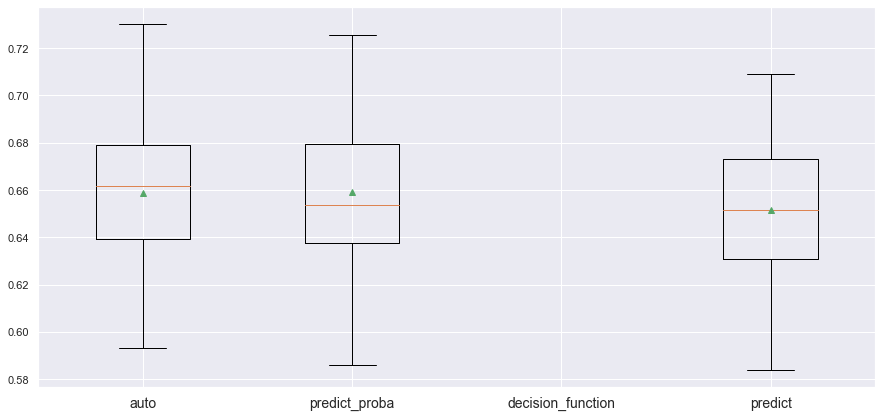

In [ ]:
def get_models(values):
    models = dict()
    for value in values:
        models[str(value)] = StackingClassifier(estimators = estimators, stack_method= value)      
    return models

models = get_models(['auto', 'predict_proba', 'decision_function', 'predict'])
return_results(models)

### Conclusions

In [ ]:
modelST = StackingClassifier(estimators = estimators, stack_method= 'auto')   

In [ ]:
avg_score(modelST, X_robust, y, X_robust.columns)

('0.942+/-0.0', '0.901+/-0.01', '0.658+/-0.03', 0.658)

# Submission export

In [ ]:
sample.set_index('Access_ID', inplace = True)

In [78]:
best_model = RandomForestClassifier(ccp_alpha =5e-06,
                                 class_weight = 'balanced',
                                 bootstrap = True,
                                 min_samples_leaf = 5,
                                 min_samples_split = 6,
                                 max_depth = 30,
                                 criterion = 'gini',
                                 n_estimators = 80,
                                 max_features='auto',
                                 warm_start=False).fit(X_standard,y)

labels_test = best_model.predict(test_standard)
sample['Buy'] = labels_test
sample.to_csv(r'Group28__Version42')

__The Final Submission was the version 39__